<a href="https://colab.research.google.com/github/amymailo/fraud_detection_using_python/blob/main/Fraud_Detection_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

Step 1. Data collection and exploration

In [ ]:
# Read data in
data = pd.read_csv('loans_full_schema.csv')

# Display first few rows
print(data.head())

In [ ]:
# Get some basic information about the data
print(data.info())

In [ ]:
# Summary statistics of numerical columns
print(data.describe())

In [ ]:
# Count the number of missing values in each column
print(data.isnull().sum())

In [ ]:
# Explore specific columns
print(data['emp_title'].value_counts())  # Count of job titles
print(data['state'].value_counts())  # Count of states
print(data['loan_status'].value_counts())  # Count of loan statuses

In [ ]:
# Data filtering
filtered_data = data[data['loan_amount'] > 10000]  # Filter data based on loan amount

In [ ]:
# Data visualization (requires matplotlib, seaborn, or other libraries)
import matplotlib.pyplot as plt
import seaborn as sns

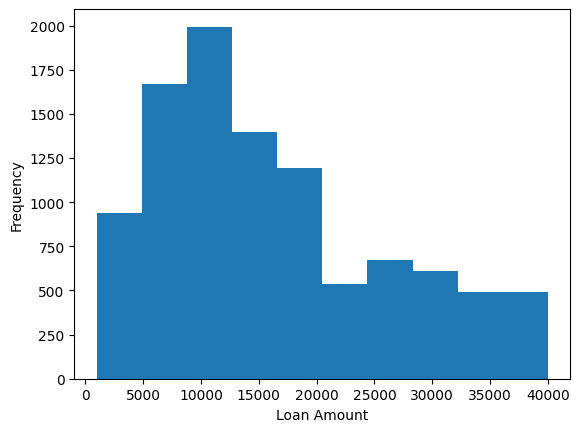

In [ ]:
# Histogram of loan amounts
plt.hist(data['loan_amount'], bins=10)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()
# This right-skewed histogram displays the frequency distribution of loan amounts.
# The loan amount categories are on the x-axis. The frequency (counts of) loans
# that fall into each category are represented on the y-axis.
# A large proportion of the loans have lower amounts

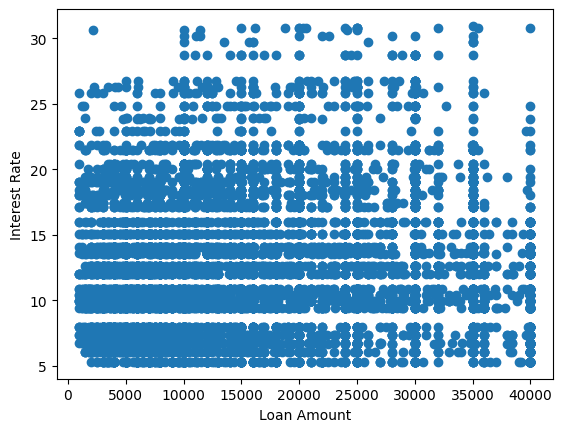

In [ ]:
# Scatter plot of loan amount versus interest rate
plt.scatter(data['loan_amount'], data['interest_rate'])
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

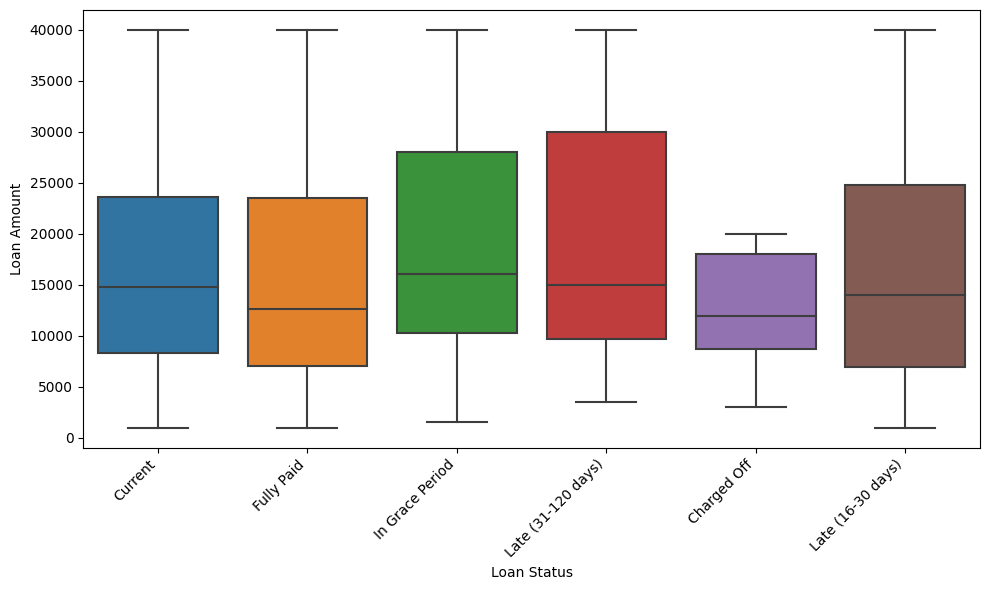

In [ ]:
# Box plot of loan amount by loan status
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.boxplot(data=data, x='loan_status', y='loan_amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate the x-axis tick labels
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.tight_layout()  # Adjust the plot layout for better spacing
plt.show()

<ipython-input-13-2a17570bde17>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


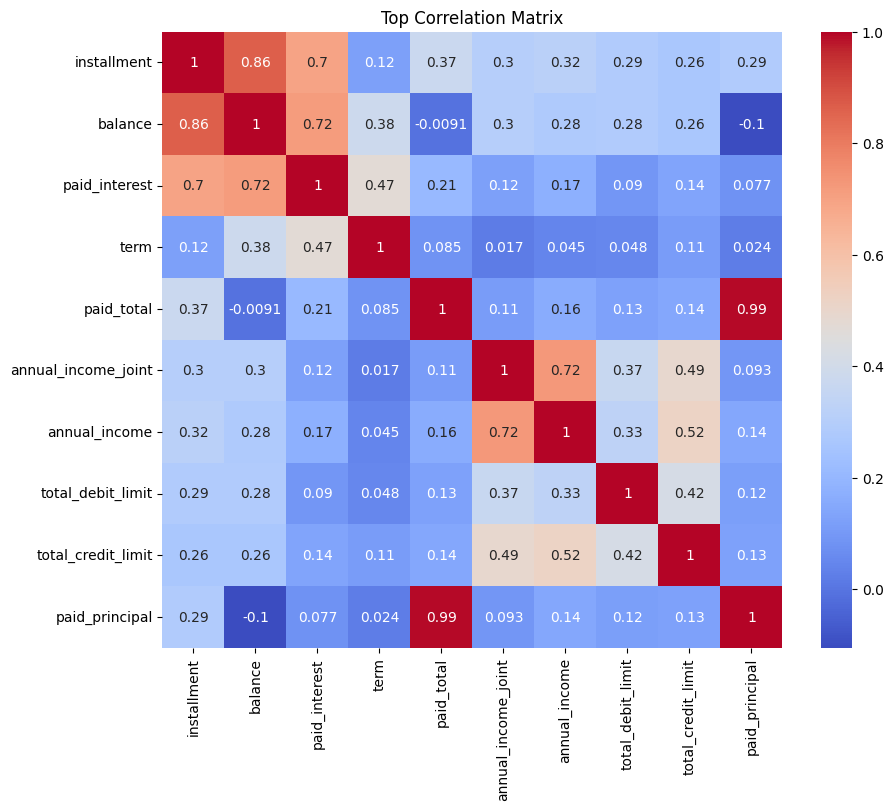

In [ ]:
# Calculate the correlation matrix for all variables in the DataFrame 'data'
correlation_matrix = data.corr()
# Correlation Analysis
# Get the correlation values of 'loan_amount' with other variables
loan_amount_correlation = correlation_matrix['loan_amount'].abs().sort_values(ascending=False)

# Select the top 10 variables with the highest correlation
top_correlated_variables = loan_amount_correlation[1:11]  # Exclude 'loan_amount' itself

# Subset the correlation matrix for the top correlated variables
top_correlation_matrix = correlation_matrix.loc[top_correlated_variables.index, top_correlated_variables.index]

# Visualize a simplified correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Top Correlation Matrix')
plt.show()

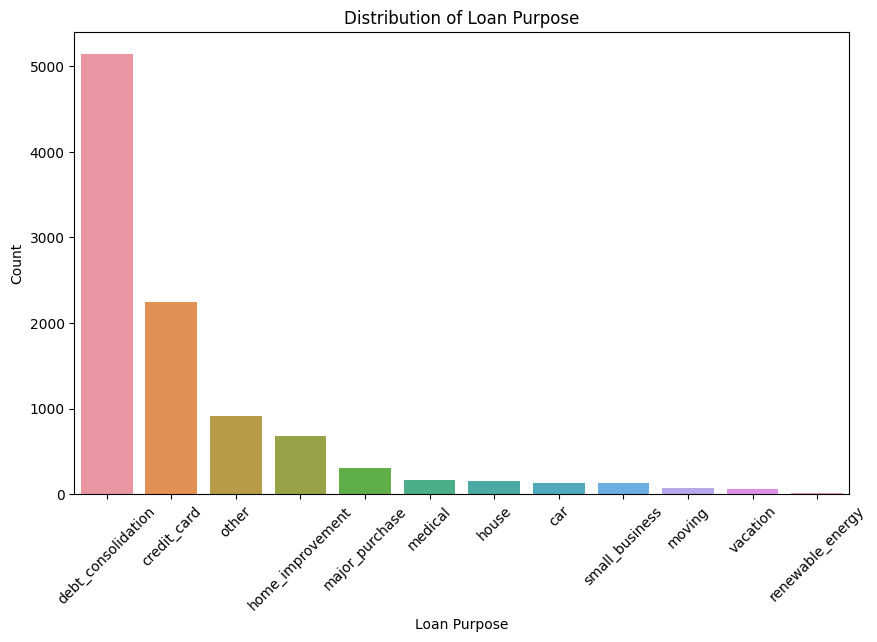

In [ ]:
# Calculate the count of each loan purpose category
loan_purpose_counts = data['loan_purpose'].value_counts()

# Sort the loan purpose categories based on count in descending order
sorted_loan_purposes = loan_purpose_counts.sort_values(ascending=False)

# Create a bar plot with the sorted loan purposes
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan_purpose', order=sorted_loan_purposes.index)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Loan Purpose')
plt.show()
#The most popular loan purpose are debt consolidation and credit card.

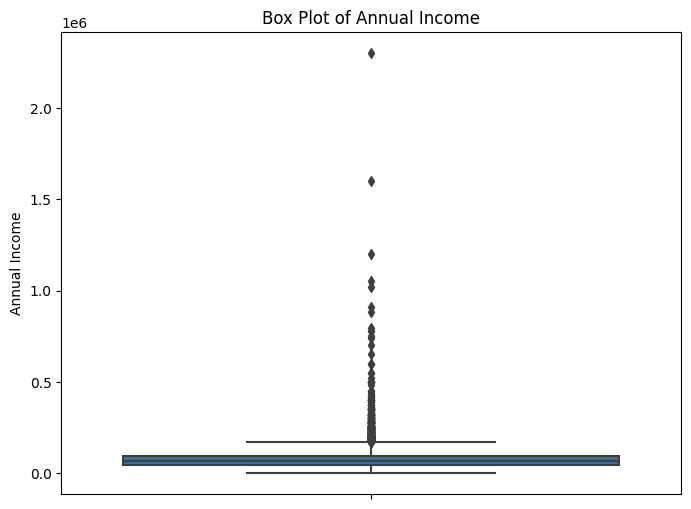

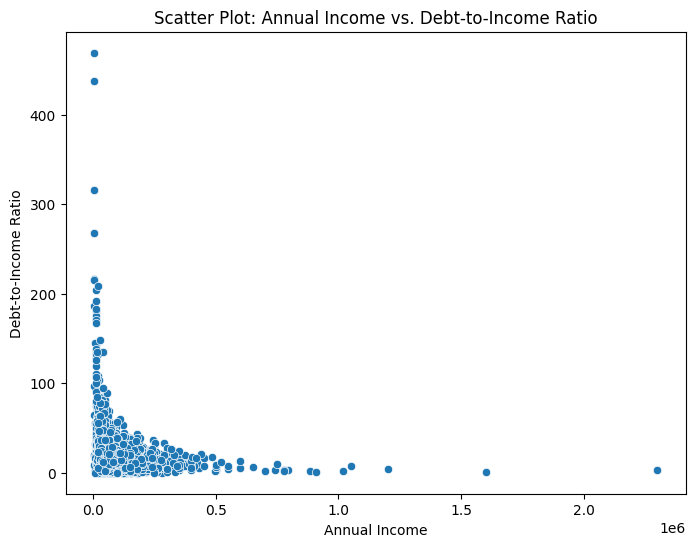

In [ ]:
# Outlier Detection
# Box plot of annual income
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='annual_income')
plt.ylabel('Annual Income')
plt.title('Box Plot of Annual Income')
plt.show()

# Scatter plot of annual income versus debt-to-income ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='annual_income', y='debt_to_income')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Scatter Plot: Annual Income vs. Debt-to-Income Ratio')
plt.show()

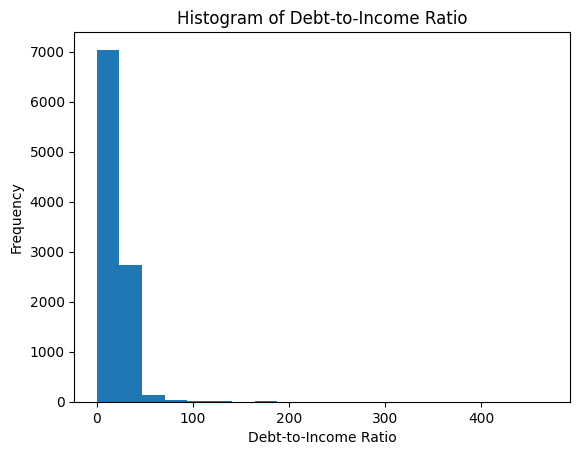

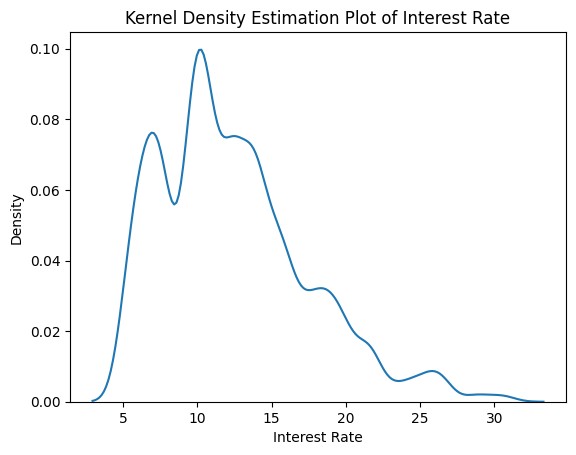

In [ ]:
#Distribution Analysis
# Histogram of debt-to-income ratio
plt.hist(data['debt_to_income'], bins=20)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Debt-to-Income Ratio')
plt.show()
# It appears that most of the individuals in this dataset have a debt-to-income
# ratio below 100. This suggests that many of them are not overly burdened by debt,
# so the individuals in this dataset may have more disposable income.

# KDE plot of interest rate
sns.kdeplot(data=data, x='interest_rate')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of Interest Rate')
plt.show()
# This plot reflects how the interest rates are distributed in the dataset
# It appears the interest rates are more concentrated between 5 and 10 (where the plot has a denser area)

Step 2. Data preprocessing

In [ ]:
# Handle missing values if any
data = data.dropna()

Step 3. Split the data

In [ ]:
# Split the data into training and testing sets
X = data.drop('loan_status', axis=1)  # Features
y = data['loan_status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 4. Model selection and training & Model evaluation  

In [ ]:
# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
# Align the training and test sets to ensure consistent feature names
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1)

In [ ]:
# Fill missing values in the encoded datasets with the median
imputer = SimpleImputer(strategy='median')
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

I chose to use a Random Forest model because it can handle non-linear relationship between features and the target variable. RF is robust to outliers and noise, meaning that it's less sensitive to outliers and noisy data in that it can use several decision trees (ensemble method) and aggregate its predictions to reduce overfitting and increase the model's stability. RF also helped me handle the cateogrical vairables. Finally, RF allowed me to simply measure feature importance  

In [35]:
# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

# Predict the loan status for the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

# Random Forest Classifier
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Model Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)


Accuracy: 0.8780487804878049
Confusion Matrix:
[[36  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]]
Random Forest Model Metrics:
Accuracy: 0.8780487804878049
Precision: 0.7709696609161214
Recall: 0.8780487804878049
F1-score: 0.8210326259106747


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the training and test sets to ensure consistent feature names
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1)

# Fill missing values in the encoded datasets with the median
imputer = SimpleImputer(strategy='median')
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Predict the loan status for the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Logistic Regression Model:")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

# Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted')
lr_recall = recall_score(y_test, y_pred, average='weighted')
lr_f1 = f1_score(y_test, y_pred, average='weighted')

from sklearn.metrics import precision_score, recall_score, f1_score

print("Logistic Regression Model Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print()

Logistic Regression Model:
Accuracy: 0.8536585365853658
Confusion Matrix:
[[35  0  0  0  1]
 [ 0  0  0  0  1]
 [ 2  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]]
Logistic Regression Model Metrics:
Accuracy: 0.8536585365853658
Precision: 0.7879924953095685
Recall: 0.8536585365853658
F1-score: 0.8195121951219513



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the training and test sets to ensure consistent feature names
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1)

# Fill missing values in the encoded datasets with the median
imputer = SimpleImputer(strategy='median')
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Train an SVM model
model = SVC()
model.fit(X_train_scaled, y_train)

# Predict the loan status for the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("SVM Model:")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

# Support Vector Machines (SVM)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')

print("SVM Model Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print()

SVM Model:
Accuracy: 0.8780487804878049
Confusion Matrix:
[[36  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]]
SVM Model Metrics:
Accuracy: 0.8780487804878049
Precision: 0.7709696609161214
Recall: 0.8780487804878049
F1-score: 0.8210326259106747



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the updated metrics, the Random Forest model consistently outperforms the Logistic Regression and SVM models. It achieves higher accuracy (87.8%) and recall (87.8%) compared to the other models, while maintaining a competitive precision (77.1%) and F1-score (82.1%). Therefore, the Random Forest model is the preferred choice for loan classification due to its overall superior performance.